<h1>About Dataset</h1>
<h2>Dataset Overview</h2>
<p>The <strong>Spending Patterns Dataset</strong> provides a synthetic representation of consumer spending behavior across various categories. This dataset is ideal for exploratory data analysis, statistical modeling, and machine learning applications related to financial forecasting, customer segmentation, or consumer behavior analysis.</p>
<h2>Dataset Features</h2>
<p>The dataset contains 10,000 transactions for 200 unique customers. Each transaction is associated with detailed information, including category, item, quantity, price, payment method, and transaction date.</p>
Data Source from Kaggle <br/>
<a href="https://www.kaggle.com/datasets/ahmedmohamed2003/spending-habits">Spending Habits</a>

In [11]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Data Collecting and Data Cleaning

In [2]:
df = pd.read_csv("spending_patterns_detailed.csv")
df.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28


In [3]:
df.shape

(10000, 9)

#### 2. Data Preprocessing

In [4]:
df.isnull().sum()

Customer ID         0
Category            0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [5]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Customer ID, Category, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date]
Index: []


In [6]:
df.dtypes

Customer ID          object
Category             object
Item                 object
Quantity              int64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object

#### 3. Exploratory Data Analysis (EDA)

In [9]:
df.describe(include='all')

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000
unique,200,13,48,NaN,NaN,NaN,4,3,744
top,CUST_0142,Groceries,Dentist Visit,NaN,NaN,NaN,Digital Wallet,In-store,2023-12-29
freq,72,799,278,NaN,NaN,NaN,2560,3387,28
mean,NaN,NaN,NaN,2.237200,969.957948,2534.750890,NaN,NaN,NaN
std,NaN,NaN,NaN,1.481133,6104.403843,19676.741772,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.110000,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,12.960000,25.957500,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,51.860000,88.115000,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,177.587500,336.375000,NaN,NaN,NaN


##### 1. Purchase Frequency

In [13]:
# Pivot Data
pivot_data = df.pivot_table(values="Quantity", index="Category", columns="Item", aggfunc="sum", fill_value=0)

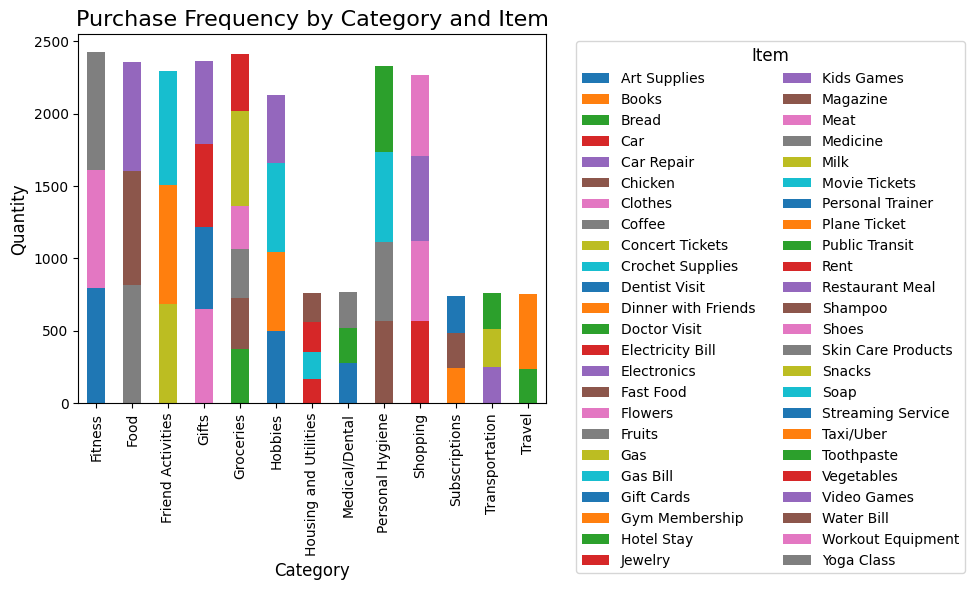

In [20]:
# Plot stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Purchase Frequency by Category and Item", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.legend(title="Item", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10, title_fontsize=12, ncol=2)
plt.tight_layout()
plt.show()

In [21]:
# Total Quantity per Category
category_summary = df.groupby("Category")["Quantity"].sum().reset_index()
# Total Quantity per Item
item_summary = df.groupby("Item")["Quantity"].sum().reset_index()

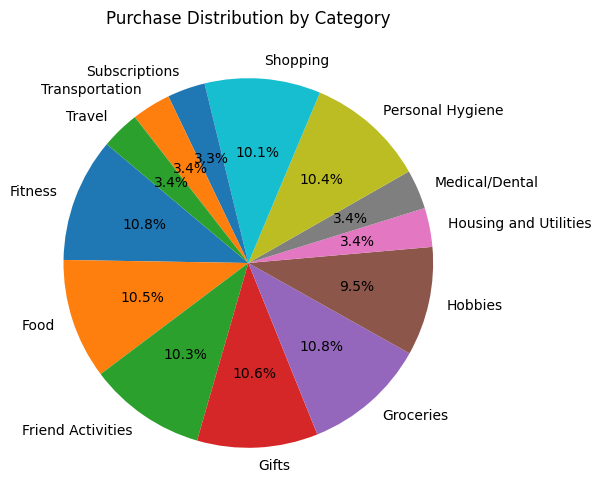

In [22]:
# Plot
plt.figure(figsize=(8, 6))
plt.pie(category_summary["Quantity"], labels=category_summary["Category"], autopct='%1.1f%%', startangle=140)
plt.title("Purchase Distribution by Category")
plt.show()

##### 2. Frequently purchased products

In [23]:
# Calculate total purchases per item
item_summary = df.groupby("Item")["Quantity"].sum().reset_index()
# Sort by number of purchases (descending)
item_summary = item_summary.sort_values(by="Quantity", ascending=False)
# Top 10 frequently purchased products
print(item_summary.head(10))

                   Item  Quantity
11  Dinner with Friends       823
47           Yoga Class       819
7                Coffee       815
46    Workout Equipment       813
30     Personal Trainer       795
29        Movie Tickets       787
15            Fast Food       787
34      Restaurant Meal       753
8       Concert Tickets       686
16              Flowers       651


##### 3. Average amount spent